In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

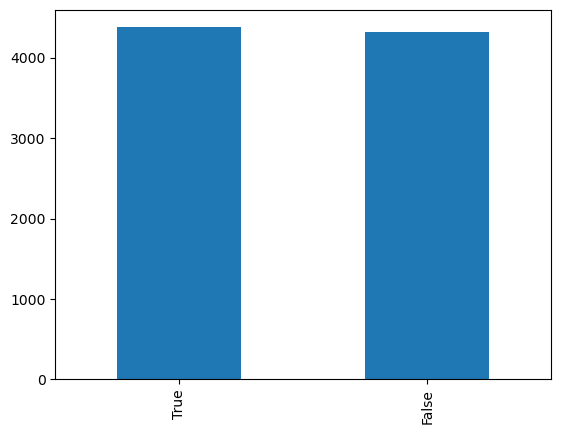

In [4]:
plot_df = df_train.Transported.value_counts()
plot_df.plot(kind="bar")

In [5]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_train = df_train.drop(['PassengerId', 'Name'], axis='columns')
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [7]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
pd.pivot_table(df_train ,index = 'Transported',values =['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'] )


,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


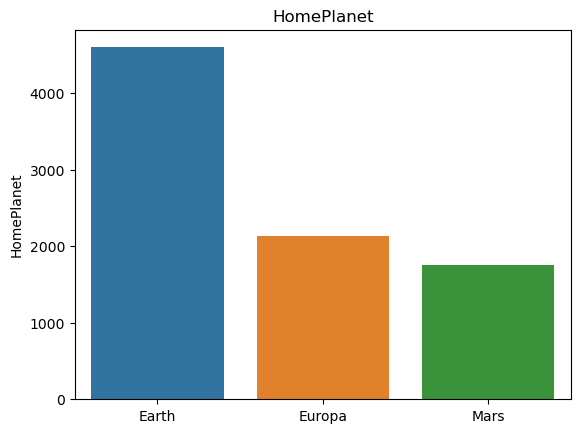

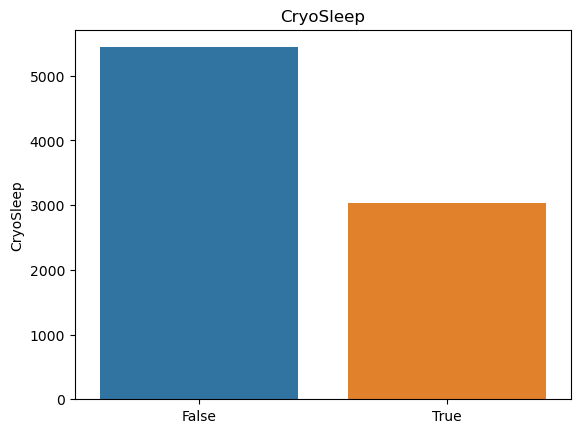

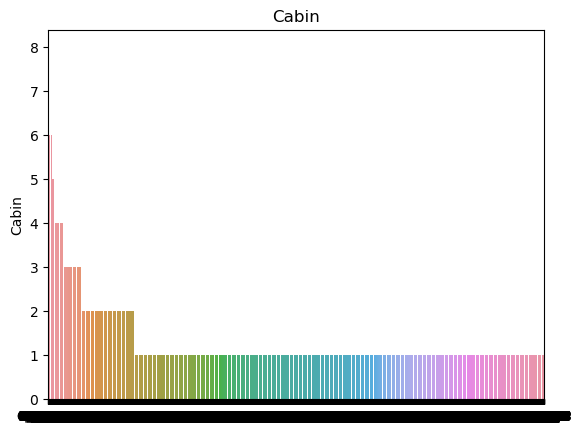

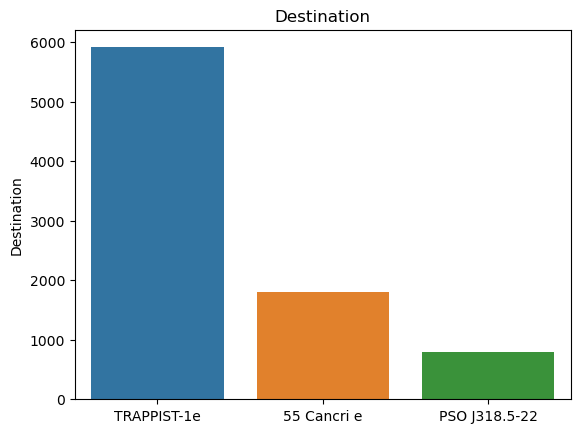

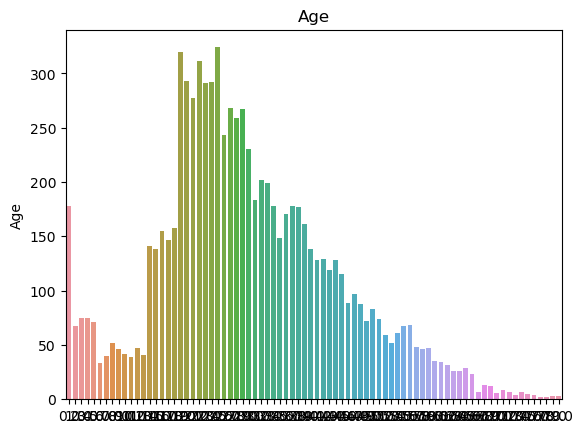

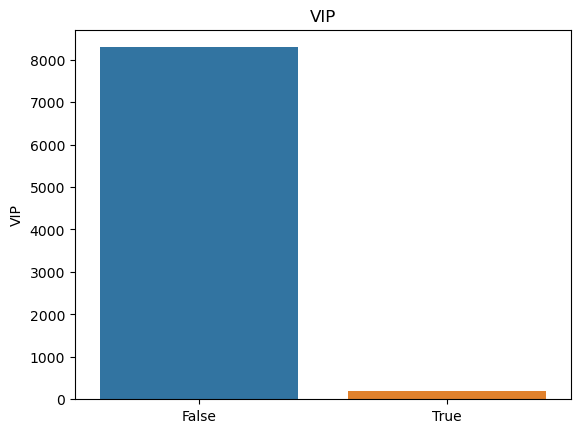

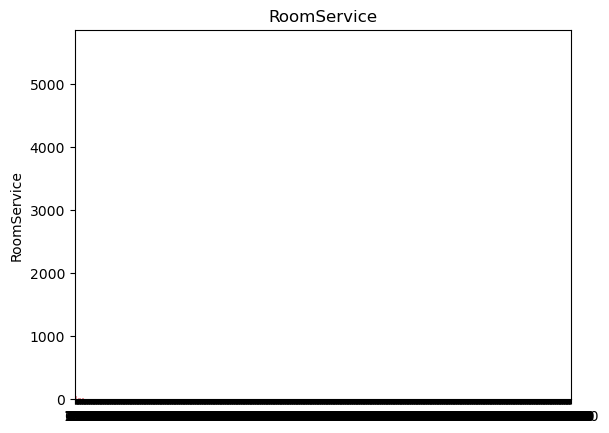

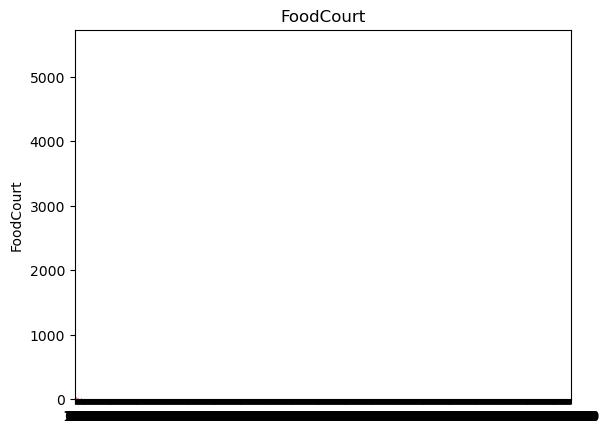

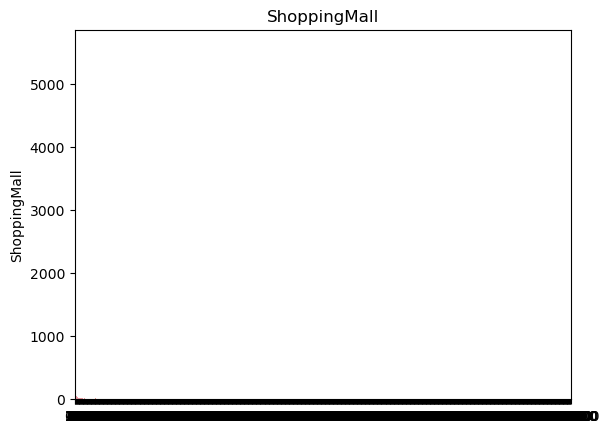

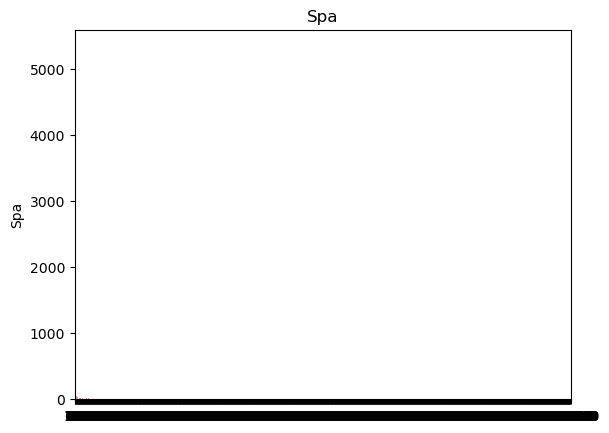

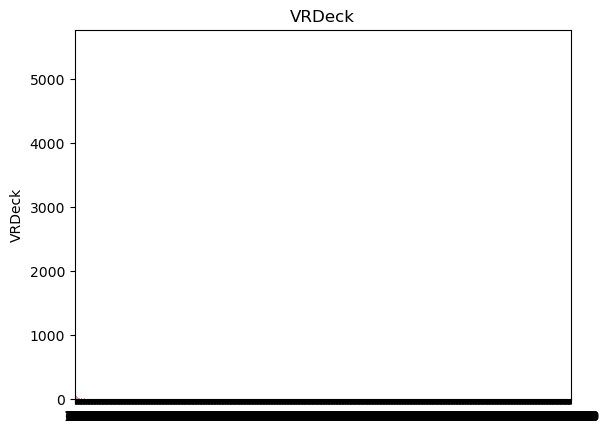

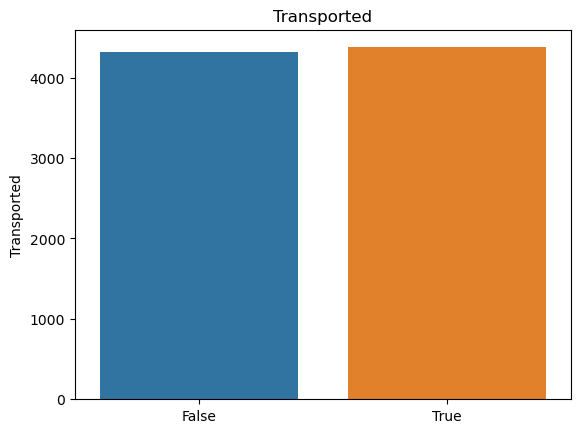

In [10]:
for i in df_train.columns:
    sns.barplot(x=df_train[i].value_counts().index,y=df_train[i].value_counts()).set_title(i)
    plt.show()

In [11]:
df_train.isnull().sum().sort_values(ascending=False)


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [13]:
df_train[['VIP', 'CryoSleep', 'FoodCourt','RoomService','ShoppingMall', 'Spa', 'VRDeck']] = df_train[['VIP','RoomService', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df_train.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
Age             179
CryoSleep         0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [14]:
df_train.Age = df_train.Age.fillna(df_train.Age.median())

In [15]:
df_train.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [16]:
df_train['VIP'] =df_train['VIP'].astype(int)
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)
df_train['Transported'] = df_train['Transported'].astype(int)
df_train['FoodCourt'] = df_train['FoodCourt'].astype(int)

In [17]:
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0,0.0,0.0,0.0,0
1,Earth,109,F/0/S,TRAPPIST-1e,24.0,0,9.0,0,25.0,549.0,44.0,1
2,Europa,43,A/0/S,TRAPPIST-1e,58.0,1,3576.0,0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,1283.0,0,371.0,3329.0,193.0,0
4,Earth,303,F/1/S,TRAPPIST-1e,16.0,0,70.0,0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,55 Cancri e,41.0,1,6819.0,0,0.0,1643.0,74.0,0
8689,Earth,0,G/1499/S,PSO J318.5-22,18.0,0,0.0,1,0.0,0.0,0.0,0
8690,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0,1872.0,1.0,0.0,1
8691,Europa,0,E/608/S,55 Cancri e,32.0,0,1049.0,0,0.0,353.0,3235.0,0


In [18]:
df_train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [19]:
df_train.isnull().sum().sort_values(ascending=False)


HomePlanet      201
Cabin           199
Destination     182
CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [20]:
df_train.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [21]:
df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split("/", expand = True)
df_train = df_train.drop("Cabin", axis='columns')

    



In [22]:
for col in df_train.select_dtypes(include=['object']):
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

In [23]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0,0.0,0.0,0.0,0,B,0,P
1,Earth,109,TRAPPIST-1e,24.0,0,9.0,0,25.0,549.0,44.0,1,F,0,S
2,Europa,43,TRAPPIST-1e,58.0,1,3576.0,0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,1283.0,0,371.0,3329.0,193.0,0,A,0,S
4,Earth,303,TRAPPIST-1e,16.0,0,70.0,0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,6819.0,0,0.0,1643.0,74.0,0,A,98,P
8689,Earth,0,PSO J318.5-22,18.0,0,0.0,1,0.0,0.0,0.0,0,G,1499,S
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0,1872.0,1.0,0.0,1,G,1500,S
8691,Europa,0,55 Cancri e,32.0,0,1049.0,0,0.0,353.0,3235.0,0,E,608,S


In [24]:
df_train.isnull().sum().sort_values(ascending=False)


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

In [25]:
df_train.Deck.unique()


array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [26]:
df_train.Side.unique()


array(['P', 'S'], dtype=object)

In [27]:
df_train.Num.unique()


array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [28]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Num', 'Side'],
      dtype='object')

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   int64  
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   object 
 12  Num           8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 950.9+ KB


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in df_train.columns:    
    if df_train[column].dtype == 'object' or df_train[column].dtype == 'bool':
        le = LabelEncoder()
        df_train[column] = le.fit_transform(df_train[column].astype(str))

In [31]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0,0.0,0.0,0.0,0,1,0,0
1,0,109,2,24.0,0,9.0,0,25.0,549.0,44.0,1,5,0,1
2,1,43,2,58.0,1,3576.0,0,0.0,6715.0,49.0,0,0,0,1
3,1,0,2,33.0,0,1283.0,0,371.0,3329.0,193.0,0,0,0,1
4,0,303,2,16.0,0,70.0,0,151.0,565.0,2.0,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,6819.0,0,0.0,1643.0,74.0,0,0,1795,0
8689,0,0,1,18.0,0,0.0,1,0.0,0.0,0.0,0,6,548,1
8690,0,0,2,26.0,0,0.0,0,1872.0,1.0,0.0,1,6,551,1
8691,1,0,0,32.0,0,1049.0,0,0.0,353.0,3235.0,0,4,1385,1


In [32]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Num', 'Side'],
      dtype='object')

In [33]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [34]:
df_train[['CryoSleep', 'Age', 'RoomService','ShoppingMall', 'Spa', 'VRDeck', 'Num']]= scale.fit_transform(df_train[['CryoSleep', 'Age', 'RoomService','ShoppingMall', 'Spa', 'VRDeck', 'Num']])
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,-0.333105,2,0.711945,0,-0.281027,0,-0.283579,-0.270626,-0.263003,0,1,-1.892290,0
1,0,-0.168073,2,-0.334037,0,-0.275387,0,-0.241771,0.217158,-0.224205,1,5,-1.892290,1
2,1,-0.268001,2,2.036857,1,1.959998,0,-0.283579,5.695623,-0.219796,0,0,-1.892290,1
3,1,-0.333105,2,0.293552,0,0.523010,0,0.336851,2.687176,-0.092818,0,0,-1.892290,1
4,0,0.125652,2,-0.891895,0,-0.237159,0,-0.031059,0.231374,-0.261240,1,5,-1.890324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,-0.333105,0,0.851410,1,3.992336,0,-0.283579,1.189173,-0.197751,0,0,1.636723,0
8689,0,-0.333105,1,-0.752431,0,-0.281027,1,-0.283579,-0.270626,-0.263003,0,6,-0.814909,1
8690,0,-0.333105,2,-0.194573,0,-0.281027,0,2.846999,-0.269737,-0.263003,1,6,-0.809011,1
8691,1,-0.333105,0,0.223820,0,0.376365,0,-0.283579,0.043013,2.589576,0,4,0.830654,1


In [35]:
X = df_train.drop(['Transported'], axis='columns')
y = df_train['Transported']


In [36]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test
test1 = test.copy()

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [38]:
test.Age = test.Age.fillna(test.Age.median())

In [39]:
test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split("/", expand = True)
test = test.drop("Cabin", axis='columns')

In [40]:
for col in test.select_dtypes(include=['object']):
    test[col].fillna(test[col].mode()[0], inplace=True)

In [41]:
test.Destination.unique()

array(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], dtype=object)

In [42]:
test.Deck.unique()

array(['G', 'F', 'C', 'B', 'D', 'E', 'A', 'T'], dtype=object)

In [43]:
test.Side.unique()

array(['S', 'P'], dtype=object)

In [44]:
test.Num.unique()

array(['3', '4', '0', ..., '1890', '1794', '1503'], dtype=object)

In [45]:
test = test.drop(['PassengerId', 'Name'], axis='columns')
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,F,4,S
4274,Mars,True,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,Europa,False,TRAPPIST-1e,26.0,False,0.0,2680.0,0.0,0.0,523.0,D,297,P


In [46]:
test.isnull().sum().sort_values(ascending=False)


FoodCourt       106
Spa             101
ShoppingMall     98
RoomService      82
VRDeck           80
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Deck              0
Num               0
Side              0
dtype: int64

In [47]:
test[['VIP', 'CryoSleep', 'FoodCourt','RoomService','ShoppingMall', 'Spa', 'VRDeck']] = test[['VIP','RoomService', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
test.isnull().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
dtype: int64

In [48]:
test['VIP'] =test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)
test['FoodCourt'] = test['FoodCourt'].astype(int)

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in test.columns:    
    if test[column].dtype == 'object' or test[column].dtype == 'bool':
        le = LabelEncoder()
        test[column] = le.fit_transform(test[column].astype(str))

In [50]:
test[['CryoSleep', 'Age', 'RoomService','ShoppingMall', 'Spa', 'VRDeck', 'Num']]= scale.fit_transform(test[['CryoSleep', 'Age', 'RoomService','ShoppingMall', 'Spa', 'VRDeck', 'Num']])


In [51]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0,-0.357339,2,-0.114147,0,-0.283840,1,-0.312173,-0.267841,-0.246712,6,0.122977,1
1,0,-0.357339,2,-0.684313,0,-0.277879,0,-0.312173,2.287504,-0.246712,5,0.386651,1
2,1,-0.357339,0,0.170937,0,-0.283840,1,-0.312173,-0.267841,-0.246712,2,-1.897704,1
3,1,-0.357339,2,0.669832,0,4.121518,0,-0.312173,-0.104002,0.226648,2,-1.895240,1
4,0,-0.340723,2,-0.613042,0,-0.283840,0,0.832122,-0.267841,-0.246712,5,0.638004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,-0.357339,2,0.384749,0,-0.283840,1,-0.312173,-0.267841,-0.246712,6,-0.783865,1
4273,0,-0.357339,2,0.954916,0,0.277095,0,-0.281538,-0.258790,-0.130193,5,0.386651,1
4274,2,-0.357339,0,-0.185417,0,-0.283840,1,-0.312173,-0.267841,-0.246712,3,0.113120,0
4275,1,-0.357339,2,-0.185417,0,1.491019,0,-0.312173,-0.267841,0.176479,3,0.115584,0


In [52]:
import numpy as np
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.33, random_state=42)

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [55]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.69785408 0.69356223 0.6944206  0.69356223 0.71477663]
0.6988351547866614


In [56]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79055794 0.79399142 0.78283262 0.78712446 0.79896907]
0.7906951019866376


In [57]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74935622 0.72103004 0.74678112 0.74592275 0.74226804]
0.7410716339984956


In [58]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78626609 0.78454936 0.76909871 0.77854077 0.79037801]
0.7817665884990339


In [59]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79828326 0.78369099 0.79828326 0.80515021 0.79896907]
0.7968753594973673


In [60]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.767514813523876

In [61]:
rf1 = RandomForestClassifier(random_state = 1)
rf1.fit(X_train,y_train)
rf1.score(X_test,y_test)

0.7884280237016382

In [62]:
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7364935517601952

In [63]:
# train the model\
from sklearn.ensemble import RandomForestClassifier



model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)

# predict the data from the test data set
predictions = model.predict(test)
n_predictions = (predictions > 0.5).astype(bool)
# save the predictions in to csv
output = pd.DataFrame({'PassengerId': test1.PassengerId, 'Transported': n_predictions.squeeze()})
output.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [64]:
output.to_csv('submission.csv', index=False)